In [0]:
import pandas as pd
import numpy as np
import datetime as datetime
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score, confusion_matrix, recall_score
import seaborn as sns

In [81]:
from google.colab import drive
drive.mount("/drive")

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


In [82]:
df_time = pd.read_csv("/drive/My Drive/Googel Analytics - Capstone/Fatema/hittime_fullyear.csv")
df_time = df_time.sort_values(by=['visitId', 'hitnum'])

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [83]:
df_time

,fullVisitorId,visitId,timeOnSite,hittime,hitnum,pt
355344,423043652415339154,1470034812,NaN,0,1,Google
355345,8294721032567046680,1470035066,NaN,0,1,Home
355346,7718623669497357235,1470035081,40.0,0,1,Home
355347,7718623669497357235,1470035081,40.0,11332,2,Store search results
355348,7718623669497357235,1470035081,40.0,16113,3,Home
...,...,...,...,...,...,...
3432075,9952572636180683443,1501657166,21.0,0,1,Google Online Store
3432076,9952572636180683443,1501657166,21.0,20676,2,Home
3432077,3800266955937177725,1501657186,NaN,0,1,YouTube | Shop by Brand | Google Merchandise S...
3432078,6344531343964394726,1501657190,NaN,0,1,YouTube | Shop by Brand | Google Merchandise S...


In [0]:
df_pages = df_time["pt"].str.split("|", expand = True) 
df_time["page1"] = df_pages[1]
df_time['page2'] = df_pages[2]
df_time['page3'] = df_pages[3]

# Create time on home page feature

In [85]:
df_time["totalVisitHits"] = df_time["hitnum"].groupby(df_time["visitId"]).transform('count')
df_time["timeOnPage"] = df_time.hittime.diff(periods = 1)
df_time["timeOnPage"] = df_time["timeOnPage"].shift(-1)
df_time

,fullVisitorId,visitId,timeOnSite,hittime,hitnum,pt,page1,page2,page3,totalVisitHits,timeOnPage
355344,423043652415339154,1470034812,NaN,0,1,Google,None,None,None,1,0.0
355345,8294721032567046680,1470035066,NaN,0,1,Home,None,None,None,1,0.0
355346,7718623669497357235,1470035081,40.0,0,1,Home,None,None,None,5,11332.0
355347,7718623669497357235,1470035081,40.0,11332,2,Store search results,None,None,None,5,4781.0
355348,7718623669497357235,1470035081,40.0,16113,3,Home,None,None,None,5,19596.0
...,...,...,...,...,...,...,...,...,...,...,...
3432075,9952572636180683443,1501657166,21.0,0,1,Google Online Store,None,None,None,2,20676.0
3432076,9952572636180683443,1501657166,21.0,20676,2,Home,None,None,None,2,-20676.0
3432077,3800266955937177725,1501657186,NaN,0,1,YouTube | Shop by Brand | Google Merchandise S...,Shop by Brand,Google Merchandise Store,None,1,0.0
3432078,6344531343964394726,1501657190,NaN,0,1,YouTube | Shop by Brand | Google Merchandise S...,Shop by Brand,Google Merchandise Store,None,1,0.0


In [86]:
df_time.timeOnPage = np.where(df_time.timeOnPage < 0, 0, df_time.timeOnPage)
df_time

,fullVisitorId,visitId,timeOnSite,hittime,hitnum,pt,page1,page2,page3,totalVisitHits,timeOnPage
355344,423043652415339154,1470034812,NaN,0,1,Google,None,None,None,1,0.0
355345,8294721032567046680,1470035066,NaN,0,1,Home,None,None,None,1,0.0
355346,7718623669497357235,1470035081,40.0,0,1,Home,None,None,None,5,11332.0
355347,7718623669497357235,1470035081,40.0,11332,2,Store search results,None,None,None,5,4781.0
355348,7718623669497357235,1470035081,40.0,16113,3,Home,None,None,None,5,19596.0
...,...,...,...,...,...,...,...,...,...,...,...
3432075,9952572636180683443,1501657166,21.0,0,1,Google Online Store,None,None,None,2,20676.0
3432076,9952572636180683443,1501657166,21.0,20676,2,Home,None,None,None,2,0.0
3432077,3800266955937177725,1501657186,NaN,0,1,YouTube | Shop by Brand | Google Merchandise S...,Shop by Brand,Google Merchandise Store,None,1,0.0
3432078,6344531343964394726,1501657190,NaN,0,1,YouTube | Shop by Brand | Google Merchandise S...,Shop by Brand,Google Merchandise Store,None,1,0.0


In [0]:
df_time.page2 = np.where(df_time.pt == "Home", df_time.pt, df_time.page2)
df_time.page2 = np.where(df_time.pt == "Google Online Store", df_time.pt, df_time.page2)

In [0]:
df_time = df_time[df_time["page2"].notna()]

In [0]:
#df_prod = pd.read_csv("products.csv")
#df_timeOnProducts = df_timeOnProducts.merge(df_prod, on = "visitId")

In [0]:
#df.loc[df.groupby("item")["diff"].idxmin()]

In [91]:
df_time

,fullVisitorId,visitId,timeOnSite,hittime,hitnum,pt,page1,page2,page3,totalVisitHits,timeOnPage
355345,8294721032567046680,1470035066,NaN,0,1,Home,None,Home,None,1,0.0
355346,7718623669497357235,1470035081,40.0,0,1,Home,None,Home,None,5,11332.0
355348,7718623669497357235,1470035081,40.0,16113,3,Home,None,Home,None,5,19596.0
355350,7718623669497357235,1470035081,40.0,40239,5,Home,None,Home,None,5,0.0
355351,4798058133221713505,1470035161,89.0,0,1,Home,None,Home,None,9,8177.0
...,...,...,...,...,...,...,...,...,...,...,...
3432075,9952572636180683443,1501657166,21.0,0,1,Google Online Store,None,Google Online Store,None,2,20676.0
3432076,9952572636180683443,1501657166,21.0,20676,2,Home,None,Home,None,2,0.0
3432077,3800266955937177725,1501657186,NaN,0,1,YouTube | Shop by Brand | Google Merchandise S...,Shop by Brand,Google Merchandise Store,None,1,0.0
3432078,6344531343964394726,1501657190,NaN,0,1,YouTube | Shop by Brand | Google Merchandise S...,Shop by Brand,Google Merchandise Store,None,1,0.0


# merge with traffic source data and clean up

In [0]:
ts = pd.read_csv("/drive/My Drive/Googel Analytics - Capstone/Fatema/trafficSource_fullyear2.csv")

In [0]:
ts = ts.drop(["Unnamed: 0", "Unnamed: 0.1"], axis = 1)

In [0]:
df_ts = ts.merge(df_time, on = "visitId").drop(["fullVisitorId_y","timeOnSite_y"], axis = 1)

In [95]:
#df_ts = df_ts.drop(["totalVisitHits", "networkDomain", "metro", "city", "region", "timeOnSite_x",
#                   "pageviews", "hits", "fullVisitorId_x", "visitId", "date", 
#                  "transactionRevenue", "totalTransactionRevenue", "sessionQualityDim", "continent", "subContinent",
#                   "isMobile", "hitnum", "pt", "gclId"], axis = 1)

df_ts = df_ts.drop(["totalVisitHits", "metro", "region", "timeOnSite_x",
                    "pageviews", "hits", "fullVisitorId_x", "visitId", "date", 
                   "transactionRevenue", "totalTransactionRevenue", "sessionQualityDim", "continent", "subContinent",
                   "isMobile", "gclId", "page3", "pt", "timeOnPage", "hitnum", "hittime"], axis = 1)

df_ts.head()

,visitNumber,visitStartTime,channelGrouping,transactions,referralPath,campaign,source,medium,keyword,adContent,page,slot,adNetworkType,browser,operatingSystem,deviceCategory,country,city,networkDomain,page1,page2
0,1,12/29/16 23:41,Organic Search,NaN,NaN,(not set),(direct),(none),NaN,NaN,NaN,NaN,NaN,Chrome,Windows,desktop,United States,not available in demo dataset,nautilus.com,None,Google Online Store
1,1,12/29/16 7:52,Organic Search,NaN,NaN,(not set),(direct),(none),NaN,NaN,NaN,NaN,NaN,Chrome,Windows,desktop,United Kingdom,London,btcentralplus.com,None,Google Online Store
2,1,12/29/16 23:51,Organic Search,NaN,NaN,(not set),(direct),(none),NaN,NaN,NaN,NaN,NaN,Chrome,Android,mobile,Australia,not available in demo dataset,optusnet.com.au,None,Google Online Store
3,1,12/29/16 20:12,Paid Search,NaN,NaN,(not set),(direct),(none),NaN,NaN,1.0,Top,Google Search,Safari,iOS,mobile,United States,Seattle,(not set),None,Google Online Store
4,2,12/29/16 4:06,Organic Search,NaN,NaN,(not set),(direct),(none),NaN,NaN,NaN,NaN,NaN,Chrome,Windows,desktop,Germany,not available in demo dataset,gwxs.de,None,Google Online Store


# Add DoW and ToD features

In [0]:
df_ts['dow'] = df_ts.visitStartTime.apply(lambda x: datetime.datetime.strptime(x, '%m/%d/%y %H:%M').weekday())
df_ts['hour'] = df_ts.visitStartTime   .apply(lambda x: datetime.datetime.strptime(x, '%m/%d/%y %H:%M').hour)

# Impute and drop unnecessary columns

In [97]:
x_or = df_ts.loc[:, df_ts.columns != 'transactions']
y_or = df_ts.transactions
y_or = np.where(y_or.isna(), 0, 1)
y_or

array([0, 0, 0, ..., 0, 0, 0])

In [98]:
nacol = pd.DataFrame(x_or.isna().any()).reset_index()
nacol.columns = ['column', 'Bool']
nacol = nacol[nacol.Bool == True]
nacol

,column,Bool
3,referralPath,True
7,keyword,True
8,adContent,True
9,page,True
10,slot,True
11,adNetworkType,True
18,page1,True


In [99]:
x_or.city = np.where(x_or.city == "not available in demo dataset", x_or.country, x_or.city)
x_or.head()


/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,visitNumber,visitStartTime,channelGrouping,referralPath,campaign,source,medium,keyword,adContent,page,slot,adNetworkType,browser,operatingSystem,deviceCategory,country,city,networkDomain,page1,page2,dow,hour
0,1,12/29/16 23:41,Organic Search,NaN,(not set),(direct),(none),NaN,NaN,NaN,NaN,NaN,Chrome,Windows,desktop,United States,United States,nautilus.com,None,Google Online Store,3,23
1,1,12/29/16 7:52,Organic Search,NaN,(not set),(direct),(none),NaN,NaN,NaN,NaN,NaN,Chrome,Windows,desktop,United Kingdom,London,btcentralplus.com,None,Google Online Store,3,7
2,1,12/29/16 23:51,Organic Search,NaN,(not set),(direct),(none),NaN,NaN,NaN,NaN,NaN,Chrome,Android,mobile,Australia,Australia,optusnet.com.au,None,Google Online Store,3,23
3,1,12/29/16 20:12,Paid Search,NaN,(not set),(direct),(none),NaN,NaN,1.0,Top,Google Search,Safari,iOS,mobile,United States,Seattle,(not set),None,Google Online Store,3,20
4,2,12/29/16 4:06,Organic Search,NaN,(not set),(direct),(none),NaN,NaN,NaN,NaN,NaN,Chrome,Windows,desktop,Germany,Germany,gwxs.de,None,Google Online Store,3,4


In [100]:
for i in nacol.column:
    try:
        x_or[i] = np.where(np.isnan(x_or[i]),0, x_or[i])
    except:
        x_or[i] = np.where(x_or[i].isna(),"No", x_or[i])
#x.isna().any()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [101]:
x_or.columns

Index(['visitNumber', 'visitStartTime', 'channelGrouping', 'referralPath',
       'campaign', 'source', 'medium', 'keyword', 'adContent', 'page', 'slot',
       'adNetworkType', 'browser', 'operatingSystem', 'deviceCategory',
       'country', 'city', 'networkDomain', 'page1', 'page2', 'dow', 'hour'],
      dtype='object')

# Label encode categoricals

In [0]:
#xcat = ['channelGrouping', 'referralPath',
 #      'campaign', 'source', 'medium', 'keyword', 'adContent', 'page', 'slot',
 #      'adNetworkType', 'browser', 'operatingSystem', 'deviceCategory',
  #     'country','dow', 'hour']
   

xcat = ['channelGrouping', 'referralPath',
       'campaign', 'source', 'medium', 'keyword', 'adContent', 'page', 'slot',
       'adNetworkType', 'browser', 'operatingSystem', 'deviceCategory',
       'country', 'city','dow', 'hour', 'page1', 'page2', 'networkDomain']

In [103]:
le = preprocessing.LabelEncoder()

for i in xcat:
    x_or[i] = le.fit_transform(x_or[i])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [0]:
x_or = x_or.drop(["visitStartTime"], axis = 1)

In [105]:
x_or.head()

,visitNumber,channelGrouping,referralPath,campaign,source,medium,keyword,adContent,page,slot,adNetworkType,browser,operatingSystem,deviceCategory,country,city,networkDomain,page1,page2,dow,hour
0,1,4,1313,0,0,0,204,24,0,0,1,11,15,0,211,784,15305,136,78,3,23
1,1,4,1313,0,0,0,204,24,0,0,1,11,15,0,210,418,3256,136,78,3,7
2,1,4,1313,0,0,0,204,24,0,0,1,11,1,1,12,48,16847,136,78,3,23
3,1,5,1313,0,0,0,204,24,1,2,0,40,18,1,211,680,0,136,78,3,20
4,2,4,1313,0,0,0,204,24,0,0,1,11,15,0,74,276,9334,136,78,3,4


In [0]:
x, x_test, y, y_test = train_test_split(x_or, y_or, test_size=0.3, random_state=42)

# Random Forest Classifier

In [107]:
rf = RandomForestClassifier(n_estimators= 7)
rf.fit(x, y) 

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=7,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
ypred_test = rf.predict(x_test)

In [0]:
rf_acc = accuracy_score(y_test,ypred_test)
rf_pscore = precision_score(y_test,ypred_test)
rf_recall = recall_score(y_test,ypred_test)
rf_f1 = f1_score(y_test,ypred_test)

#print('Accuracy Score : ' + str(accuracy_score(y_test,ypred_test)))
#print('Precision Score : ' + str(precision_score(y_test,ypred_test)))
#print('F1 Score : ' + str(f1_score(y_test,ypred_test)))

# nest =7
#Accuracy Score : 0.9851826326671261
#Precision Score : 0.9252190725668132
#1 Score : 0.9151167453193918

In [110]:
scores = cross_val_score(rf, x, y, scoring = "precision", cv=5)
scores

array([0.89095698, 0.89659024, 0.88934307, 0.89179039, 0.88670554])

# RF Confusion Matrix

In [111]:
ypred = rf.predict(x)
confusion_matrix(y_test, ypred_test)

array([[667655,   3679],
       [  6780,  33341]])

# RF feature importances

In [112]:
pd.Series(rf.feature_importances_, index=x.columns).sort_values(ascending=False)

hour               0.233841
city               0.131106
networkDomain      0.130994
dow                0.124967
visitNumber        0.118487
page1              0.077787
operatingSystem    0.045386
country            0.031570
channelGrouping    0.025363
referralPath       0.018377
browser            0.014713
source             0.011431
deviceCategory     0.009036
medium             0.007669
page2              0.007586
keyword            0.004730
adContent          0.002387
campaign           0.001293
slot               0.001232
adNetworkType      0.001056
page               0.000989
dtype: float64

# RF Probabilities

In [0]:
yproba_rf = rf.predict_proba(x_test)
yproba_rf = yproba_rf[:,1]

In [114]:
for i in list(range(0,99,10)):
    i = i/100
    yproba_rf = rf.predict_proba(x_test)
    yproba_rf = yproba_rf[:,1]
    yproba_rf[yproba_rf>i] = 1
    yproba_rf[yproba_rf<=i] = 0
    #print(i, " ", precision_score(y, yproba_rf))   
    print(i, " ",precision_score(y_test,yproba_rf), recall_score(y_test,yproba_rf), f1_score(y_test, yproba_rf))
    #print cut off and false results

0.0   0.46570058889375576 0.9539891827222652 0.6258738114120793
0.1   0.5100001348635855 0.9425487899105207 0.6618710072634987
0.2   0.7111939424690683 0.90832730988759 0.7977627704869585
0.3   0.8157541537464711 0.8786421076244361 0.8460310793784125
0.4   0.8445443879546344 0.8611948854714488 0.8527883701701776
0.5   0.900621285791464 0.831011191146781 0.8644171063377452
0.6   0.936001889243122 0.7903093143241694 0.8570077165290485
0.7   0.9515636094217886 0.7682759652052541 0.8501530738891799
0.8   0.9705213109186619 0.7122703820941652 0.8215795072305436
0.9   0.9838380668445003 0.6251090451384562 0.7644826482556811


In [115]:
yproba_rf = rf.predict_proba(x_test)
yproba_rf = yproba_rf[:,1]
yproba_rf[yproba_rf>0.5] = 1
yproba_rf[yproba_rf<=0.5] = 0

print(precision_score(y_test,yproba_rf))

0.900621285791464


# Grid search

In [117]:
rf = RandomForestClassifier()

param_grid = { 
    'n_estimators': list(range(2,30,10)),
    'max_features': ['auto'], 
    'max_depth': list(range(3,15)),  
}
 
np.random.seed(0)
grid_search = GridSearchCV(rf,param_grid, scoring = 'f1', cv=5,return_train_score=True, verbose = True, n_jobs =-1)
grid_search.fit(x,y)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  7.5min
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed: 48.2min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [118]:
ypred_test_rfgs = grid_search.predict(x_test)
confusion_matrix(y_test, ypred_test_rfgs)

array([[670546,    788],
       [ 35728,   4393]])

In [0]:
yproba_rf = grid_search.predict_proba(x_test)
yproba_rf = yproba_rf[:,1]
yproba_rf[yproba_rf>0.2] = 1
yproba_rf[yproba_rf<=0.2] = 0

rfgs_acc = accuracy_score(y_test,ypred_test_rfgs)
rfgs_pscore = precision_score(y_test,ypred_test_rfgs)
rfgs_recall = recall_score(y_test,ypred_test_rfgs)
rfgs_f1 = f1_score(y_test,ypred_test_rfgs)

In [120]:
grid_search.best_params_

{'max_depth': 14, 'max_features': 'auto', 'n_estimators': 2}

In [121]:
for i in list(range(0,99,10)):
    i = i/100
    yproba_rf = grid_search.predict_proba(x_test)
    yproba_rf = yproba_rf[:,1]
    yproba_rf[yproba_rf>i] = 1
    yproba_rf[yproba_rf<=i] = 0
    #print(i, " ", precision_score(y, yproba_rf))   
    print(i, " ",precision_score(y_test,yproba_rf), recall_score(y_test,yproba_rf), f1_score(y_test, yproba_rf))
    #print cut off and false results

0.0   0.07968707721202668 0.9982802023877769 0.14759266458708362
0.1   0.23888220684484293 0.7623439096732385 0.36377476079186966
0.2   0.3547431159058369 0.5310934423369308 0.42536456825735874
0.3   0.5224111282843895 0.30328257022506916 0.38376988945484364
0.4   0.6955447989726365 0.17549413025597568 0.28027227131597804
0.5   0.8479058096892492 0.10949378131153262 0.19394287227936954
0.6   0.9250191277735271 0.060267690237032975 0.11316251316251316
0.7   0.9632164242942686 0.028065103063233718 0.05454105110196174
0.8   0.9810554803788903 0.018070337229879614 0.03548702887909937
0.9   0.9892933618843683 0.011515166620971561 0.022765349364344142


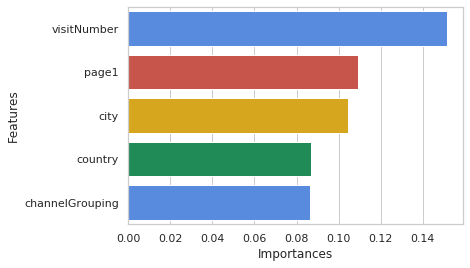

In [147]:
bestrf = grid_search.best_estimator_
rf_fi = pd.Series(bestrf.feature_importances_, index=x.columns).sort_values(ascending=False)
rf_fi = pd.DataFrame(rf_fi)
rf_fi = rf_fi.reset_index().head(5)
rf_fi.columns = ["Features", "Importances"]

sns.barplot(x="Importances", y="Features",  data=rf_fi, palette = goog)
plt.savefig("featimp_rf.png", bbox_inches='tight')

# Boost

In [0]:
np.random.seed(0)
param_grid = [
    {'subsample':[0.5,1],
    'learning_rate':[0.025,0.05,0.1],
    'max_depth':[2,3,4],
    'n_estimators':list(range(2,30,10))}]
boost = GradientBoostingClassifier()
boostgs = GridSearchCV(boost,param_grid, cv=5, scoring='precision',return_train_score=True, n_jobs=-1, verbose= True)
np.random.seed(0)
boostgs.fit(x,y)

ypred_boost_test=boostgs.predict(x_test)

print('Accuracy Score : ' + str(accuracy_score(y_test,ypred_boost_test)))
print('Precision Score : ' + str(precision_score(y_test,ypred_boost_test)))
print('F1 Score : ' + str(f1_score(y_test,ypred_boost_test)))

Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 11.2min
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed: 76.3min


In [0]:
ypred_boost_test=boostgs.predict(x_test)

confusion_matrix(y_test, ypred_boost_test)
print('Accuracy Score : ' + str(accuracy_score(y_test,ypred_boost_test)))
print('Precision Score : ' + str(precision_score(y_test,ypred_boost_test)))
print('F1 Score : ' + str(f1_score(y_test,ypred_boost_test)))


gb_acc = accuracy_score(y_test,ypred_boost_test)
gb_pscore = precision_score(y_test,ypred_boost_test)
gb_recall = recall_score(y_test,ypred_boost_test)
gb_f1 = f1_score(y_test,ypred_boost_test)

In [0]:
for i in list(range(0,99,10)):
    i = i/100
    yproba_gb = boostgs.predict_proba(x_test)
    yproba_gb = yproba_gb[:,1]
    yproba_gb[yproba_gb>i] = 1
    yproba_gb[yproba_gb<=i] = 0
    #print(i, " ", precision_score(y, yproba_rf))   
    print(i, " ", precision_score(y_test,yproba_gb), recall_score(y_test,yproba_gb))
    #print cut off and false results

Scores

        Type          Model     Score
0   Accuracy  Random Forest  0.948674
1  Precision  Random Forest  0.847906
2     Recall  Random Forest  0.109494
3         F1  Random Forest  0.864417


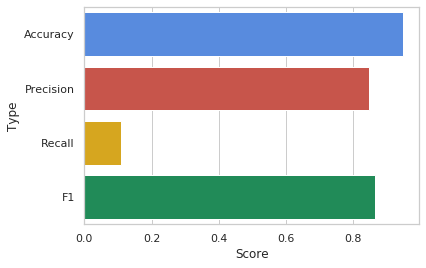

In [148]:
scores = pd.DataFrame({'Type':['Accuracy', 'Precision', 'Recall', 'F1'], 'Random Forest':[rfgs_acc, rfgs_pscore, rfgs_recall, rf_f1]})
                   #   "GB": [gb_acc, gb_pscore, gb_recall, gb_f1]})
#scores = pd.melt(scores, id_vars = "Type", value_vars=['Random Forest', 'GB'])
scores = pd.melt(scores, id_vars = "Type", value_vars=['Random Forest'])
scores.columns = ["Type", "Model", "Score"]
print(scores)

goog = ["#4285F4", "#DB4437", "#F4B400", "#0F9D58"]

sns.set(style="whitegrid")
sns.despine()
sns.barplot(x="Score", y="Type", data=scores,  palette = goog)
plt.savefig("rf_scores.png", bbox_inches='tight')